## Multiple Linear Regression Model

In [163]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [164]:
data = pd.read_excel("D:\Project_VH_2\data.xlsx")

In [165]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [166]:
## checking missing values
data.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [167]:
data.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [168]:
### summary of data
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [169]:
## defining response variable and independent variables
x = data.drop(["PE"], axis = 1)
y = data["PE"]

checking correlation between response and independent variable using scatterplot

Text(0, 0.5, 'PE')

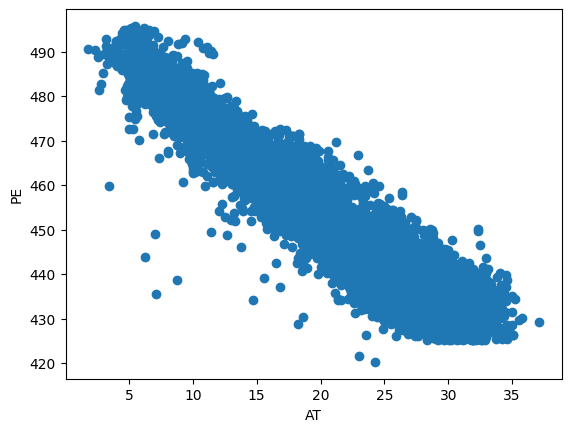

In [170]:
plt.scatter(x["AT"],y)
plt.xlabel("AT")
plt.ylabel("PE")


Text(0, 0.5, 'PE')

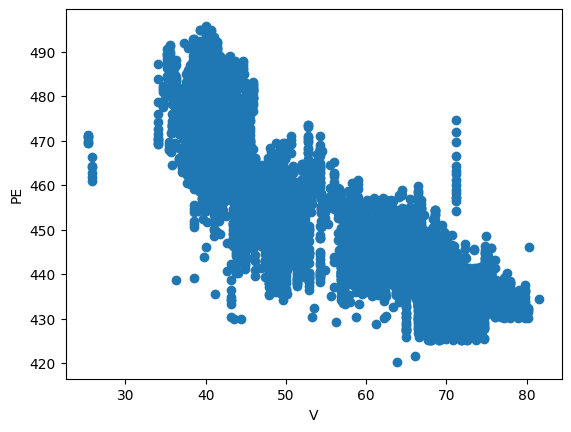

In [171]:
plt.scatter(x["V"],y)
plt.xlabel("V")
plt.ylabel("PE")

Text(0, 0.5, 'PE')

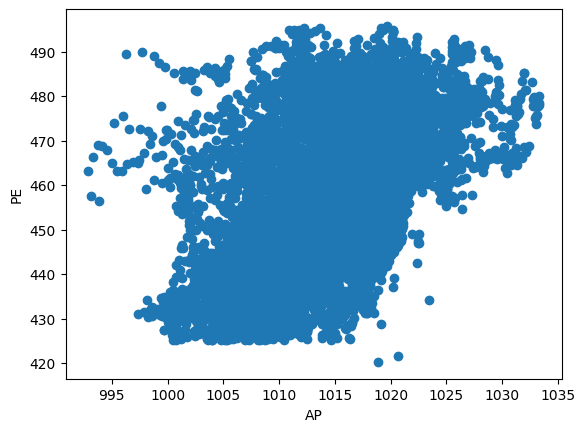

In [172]:
plt.scatter(x["AP"],y)
plt.xlabel("AP")
plt.ylabel("PE")

Text(0, 0.5, 'PE')

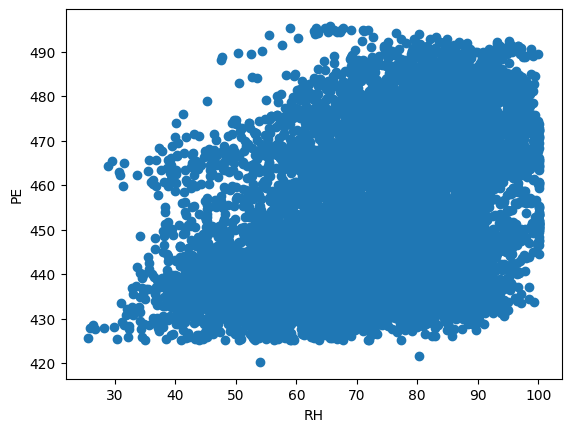

In [173]:
plt.scatter(x["RH"],y)
plt.xlabel("RH")
plt.ylabel("PE")

checking correlation between response and independent variable using scatterplot

In [174]:
## Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [175]:
## train the model on training set
from sklearn.linear_model import LinearRegression
ml = LinearRegression()


In [ ]:
ml.fit(x_train,y_train)

In [177]:
coeff = ml.coef_
coeff

array([-1.96432098, -0.24009895,  0.06801034, -0.15645329])

In [178]:
intercept = ml.intercept_
intercept

448.561317705689

In [179]:
## predict test results
y_predict = ml.predict(x_test)
y_predict

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

In [ ]:
ml.predict([(14.96, 41.76, 1024.07, 73.17)])

In [181]:
## evaluating the model
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9304112159477682

Text(0.5, 1.0, 'Actual Vs Predicted')

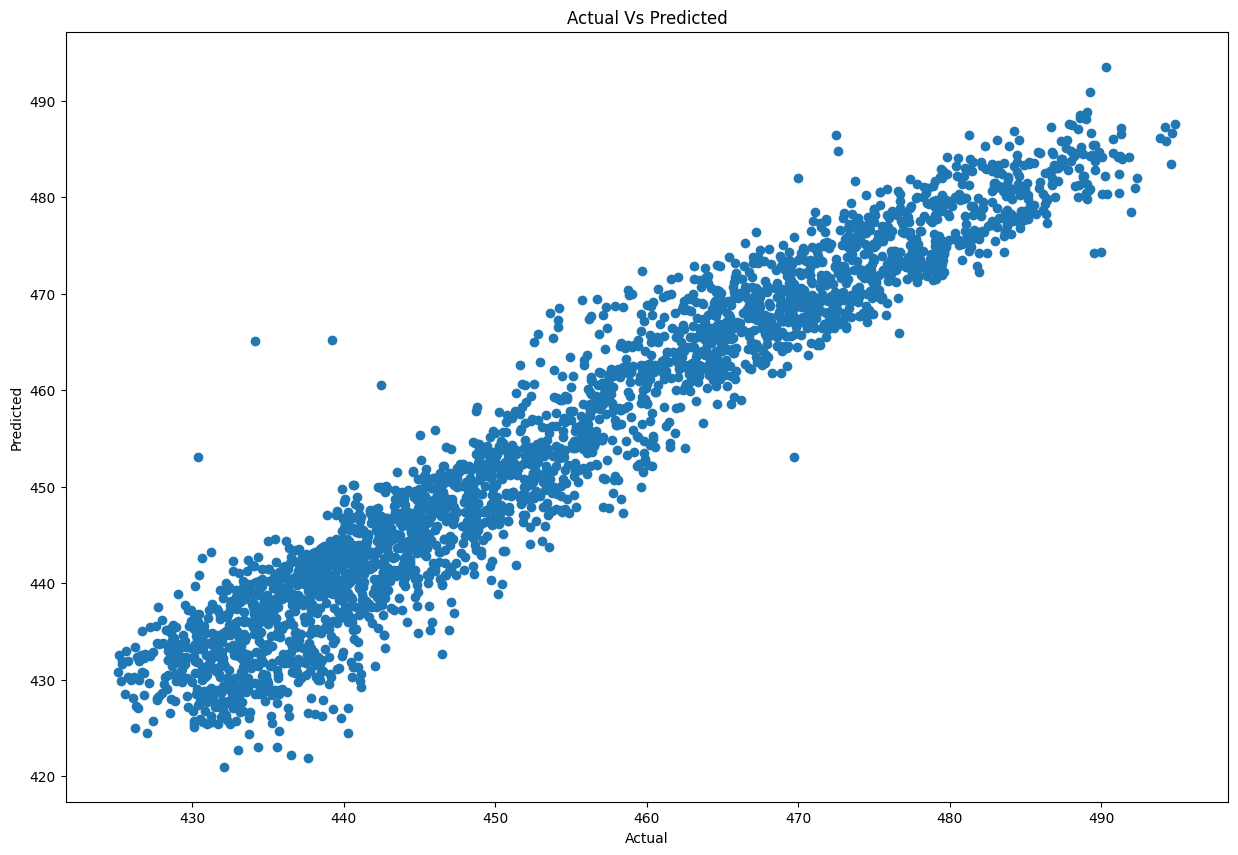

In [182]:
## plot

plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted")

In [184]:
predict_y_df = pd.DataFrame({"Actual Value" : y_test, "Predicted Value" : y_predict, "Difference" : y_test-y_predict})
predict_y_df[0:15]

,Actual Value,Predicted Value,Difference
4834,431.23,431.402451,-0.172451
1768,460.01,458.614741,1.395259
2819,461.14,462.819674,-1.679674
7779,445.90,448.601237,-2.701237
7065,451.29,457.879479,-6.589479
9482,432.68,429.676856,3.003144
9,477.50,473.017115,4.482885
4986,459.68,456.532373,3.147627
6168,477.50,474.342524,3.157476
3664,444.99,446.364396,-1.374396
